In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy import units
from scipy.integrate import cumulative_trapezoid

# Optional:
from astropy.visualization import quantity_support

#### Generating input
* extinction ($\alpha_\nu$)
* depth ($l$) and height ($z$) scale
* source function $S_\nu$

In [3]:
freq = np.linspace(-5, 5, 101)
extinction = (np.exp(- freq ** 2) + 0.5 * freq / 50 + 0.1) / units.m / 100

depth = np.logspace(0, 4, 200) * units.km
height = -depth + depth.max()

i_units = units.Quantity(1, "kW m-2 nm-1 sr-1") # intensity units

# build the source function

source_function1 = (depth.value) / 100 * i_units # source function 1, linear
source_function2 = (np.linspace(0, 500, (len(depth)))) * i_units # source function 2 narrow
source_function3 = np.exp(depth.value/ 5000)*i_units # broader

source_function4 = np.flip(source_function2)


extinction = np.tile(extinction, ((len(depth)), 1))

## Calculations

### Optical depth
$$
\tau_\nu (z_0) = -\int_\infty^{z_0} \alpha_\nu \mathrm{d}z \;\;\;\; \mathrm{(height\; scale)}
$$

$$
\tau_\nu (l_0) = \int_0^{l_0} \alpha_\nu \mathrm{d}l\;\;\;\; \mathrm{(depth\; scale)}
$$

Note that $z=\infty$ is the same point as $l=0$, and corresponds to the surface of the emitting body (here assumed to have an infinite extent). The $\tau$ integration can be done both ways.

### Emerging intensity

$$
I_\nu(\tau_\nu=0) = \int_0^\infty S_\nu e^{-\tau_\nu}\mathrm{d}\tau_\nu.
$$

Plotting

In [4]:
def plot(source_function): 
    tau = cumulative_trapezoid(extinction, -height, axis = 0, initial = 0) # compute optical depth at all heights
    intensity = np.trapz(source_function[:, np.newaxis]*np.exp(-tau), tau, axis = 0) # compute intensity at the top of the surface
    %config InLineBackend.figure_formats = ['svg']

    fig, ax = plt.subplots(2,2,figsize = (10, 7))
    ax[0, 0].plot(freq, extinction[0])
    ax[0,0].plot([freq[0]], [extinction[0, 0].value], 'bo', ms = 7)
    ax[0,0].plot([freq[50]], [extinction[0, 50].value], 'ro', ms = 7)
    ax[0,0].plot([freq[37]], [extinction[0, 37].value], 'go', ms = 7)
    ax[0,0].set_xlabel('Frequency'), ax[0,0].set_ylabel(r'Extinction [m$^{-1}$]') 
    ax[0,0].set_title('Extinction')

    ax[0,1].plot(height, tau[:, 0], 'b-')
    ax[0,1].plot(height, tau[:, 50], 'r-')
    ax[0,1].plot(height, tau[:, 37], 'g-')
    tau1_0 = np.argmin(np.abs(tau[:, 0] - 1))
    tau1_50 = np.argmin(np.abs(tau[:, 50] - 1.0))
    tau1_37 = np.argmin(np.abs(tau[:, 37] - 1.0))
    ax[0, 1].plot([height[tau1_0].value], 1, 'bo')
    ax[0, 1].plot([height[tau1_50].value], 1, 'ro')
    ax[0, 1].plot([height[tau1_37].value], 1, 'go')
    ax[0, 1].set_xlabel('Height [km]')
    ax[0,1].set_title('Optical depth')

    ax[1, 1].plot(height, source_function)
    ax[1, 1].plot(height[tau1_0], source_function[tau1_0], 'bo', ms = 7)
    ax[1, 1].plot(height[tau1_50], source_function[tau1_50], 'ro', ms = 7)
    ax[1, 1].plot(height[tau1_37], source_function[tau1_37], 'go', ms = 7)
    ax[1, 1].set_xlabel('Height [km]'); ax[1, 1].set_ylabel(r'$S_\nu$ [kW m$^{-2}$ nm$^{-1}$ sr$^{-1}$]')
    ax[1, 1].set_title('Source function')

    ax[1, 0].plot(freq, intensity)
    ax[1, 0].plot(freq[0], intensity[0], 'bo', ms = 7)
    ax[1, 0].plot(freq[50], intensity[50], 'ro', ms = 7)
    ax[1, 0].plot(freq[37], intensity[37], 'go', ms = 7)
    ax[1, 0].set_title('Intensity')
    ax[1, 0].set_xlabel('Frequency'); ax[1, 0].set_ylabel(r'Intensity [kW m$^{-2}$ nm$^{-1}$ sr$^{-1}$]')

    plt.tight_layout()
    plt.show()
    # cmd + shift + arrow = mark entire line

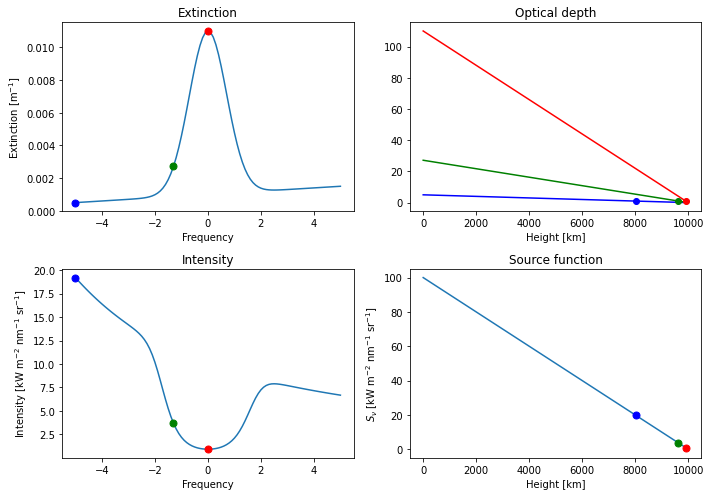

In [5]:
plot(source_function1)

How to interpret the figure:
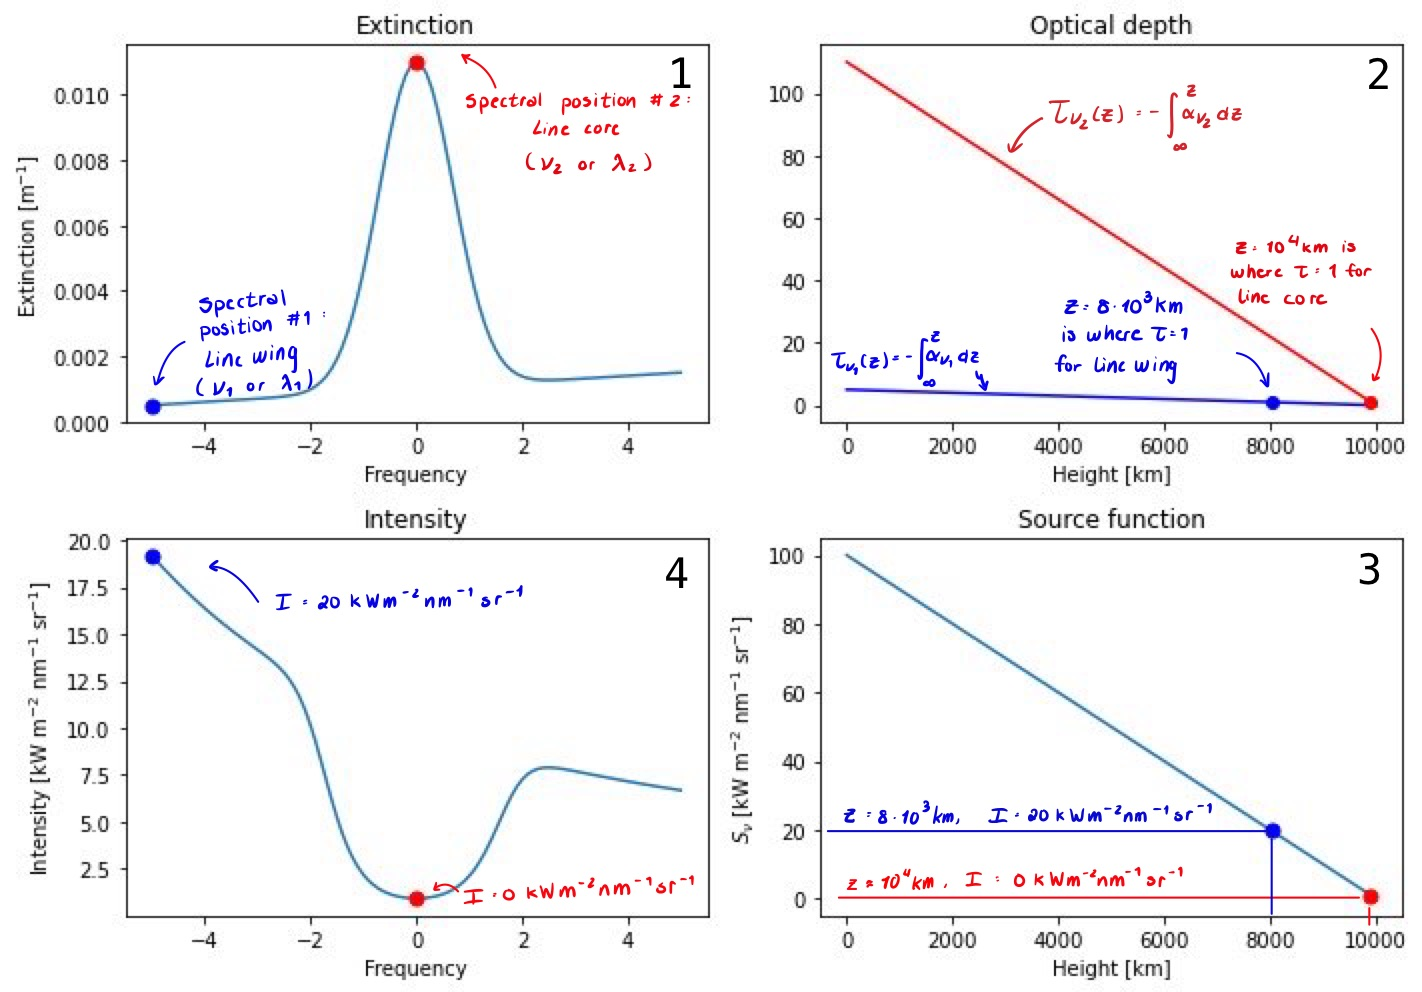

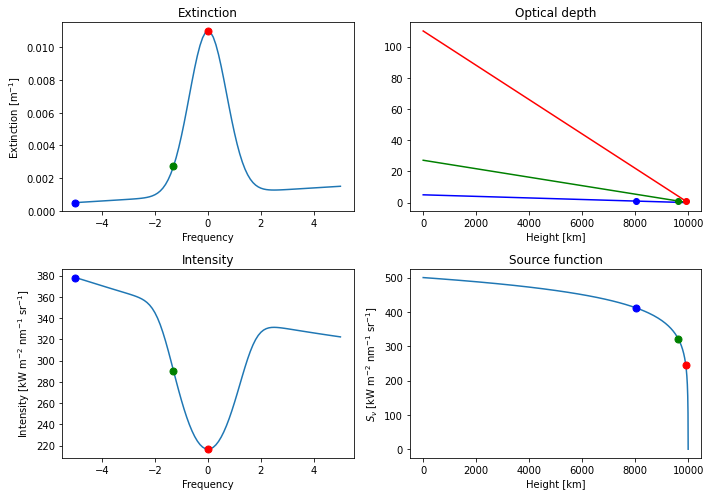

In [6]:
plot(source_function2)

A fast declining source function gives a narrow spectral line.

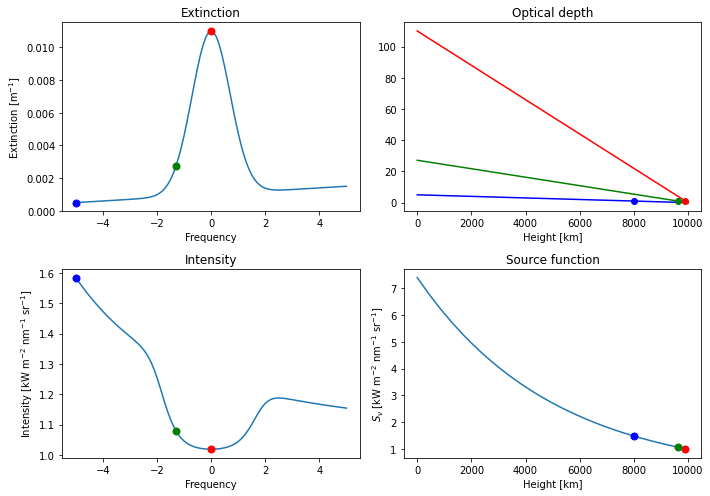

In [7]:
plot(source_function3)

A slow declining source function gives us a broad spectral line.

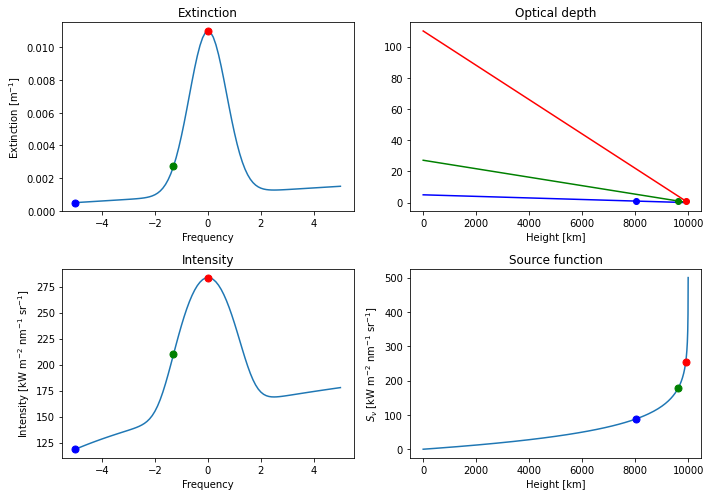

In [8]:
plot(source_function4)